In [1]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os 
import glob

In [2]:

try:
    model_path = "/home/omar/State of The Art/YOLO Pose/yolov8l-pose.pt"
    model = YOLO(model_path)
    print("Model loaded successfully.")
except EOFError as e:
    print(f"EOFError: {e}")
except FileNotFoundError:
    print("Model file not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


An error occurred: [Errno 13] Permission denied: '/home/omar'


In [4]:

# Define the directories
photos_dir = "photos"
results_dir = "results"


In [9]:

# Get a list of all image files in the photos directory
image_files = glob.glob(os.path.join(photos_dir, "*.*"))

# Process each image and save the results
processed_images = []
for image_file in image_files:
    try:
        # Perform inference on the image
        results = model(image_file)
        
        # Get the plotted results
        plotted_results = results[0].plot()
        
        # Save the plotted results
        base_name = os.path.basename(image_file)
        result_path = os.path.join(results_dir, base_name)
        cv2.imwrite(result_path, plotted_results)
        print(f"Processed and saved: {result_path}")
        
        # Append the image for plotting
        processed_images.append(plotted_results)
    
    except Exception as e:
        print(f"An error occurred while processing {image_file}: {e}")



image 1/1 /home/omar/State of The Art/YOLO Pose/photos/run_man.jpeg: 448x640 1 person, 1269.2ms
Speed: 3.4ms preprocess, 1269.2ms inference, 0.6ms postprocess per image at shape (1, 3, 448, 640)
Processed and saved: results/run_man.jpeg

image 1/1 /home/omar/State of The Art/YOLO Pose/photos/vandd.jpeg: 384x640 1 person, 1096.6ms
Speed: 1.1ms preprocess, 1096.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Processed and saved: results/vandd.jpeg

image 1/1 /home/omar/State of The Art/YOLO Pose/photos/basket.jpeg: 640x448 1 person, 1303.7ms
Speed: 1.2ms preprocess, 1303.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 448)
Processed and saved: results/basket.jpeg

image 1/1 /home/omar/State of The Art/YOLO Pose/photos/c804.jpg: 640x608 1 person, 1777.2ms
Speed: 2.6ms preprocess, 1777.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 608)
Processed and saved: results/c804.jpg

image 1/1 /home/omar/State of The Art/YOLO Pose/photos/12.jpg

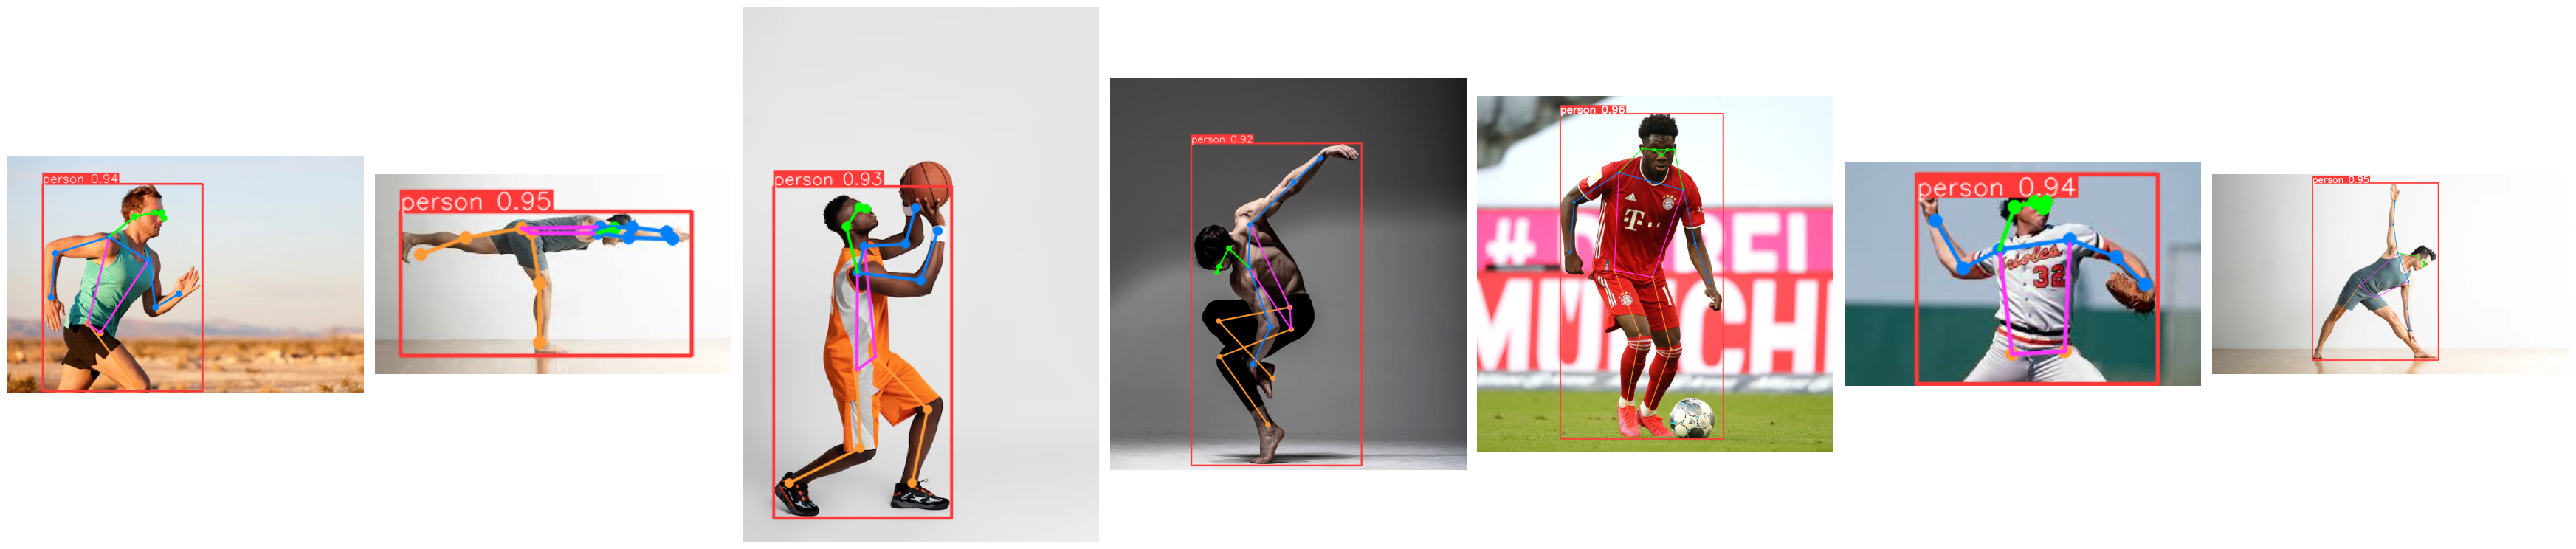

In [16]:

# Plot all processed images beside each other
num_images = len(processed_images)
fig, axes = plt.subplots(1, num_images, figsize=(num_images * 5, 30))

if num_images == 1:
    axes.imshow(cv2.cvtColor(processed_images[0], cv2.COLOR_BGR2RGB))
    axes.axis('off')
else:
    for ax, img in zip(axes, processed_images):
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')

plt.tight_layout()
plt.show()